In [1]:
import os
import time
import math
import re
import struct
import traceback
import codecs

import bitstring

import numpy as np
import matplotlib.pyplot as plt
import cv2

from PIL import Image
import IPython.display as display

In [2]:
os.listdir('.')

['.ipynb_checkpoints',
 'ETL9B_1',
 'ETL9B_2',
 'ETL9B_3',
 'ETL9B_4',
 'ETL9B_5',
 'ETL9INFO',
 'etl_9b2_inspect_data.ipynb']

In [3]:
file_list = [
    'ETL9B_1',
    'ETL9B_2',
    'ETL9B_3',
    'ETL9B_4',
    'ETL9B_5',
]

In [4]:
filename = file_list[0]
print(filename)
file_stream = bitstring.ConstBitStream(filename=filename)

ETL9B_1


**The first record of each file is zero padded dummy.**

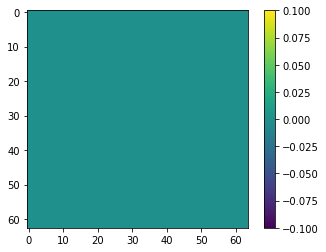

In [5]:
record = file_stream.readlist('int:16,uint:16,uint:32,bytes:504,pad:512')
record_dict = {
    'sheet_number': record[0], # type: int - Serial Sheet Number
    'JIS_KANJI_CODE': record[1], # type: binary - JIS Kanji Code (JIS X 0208)
    'JIS_READING': record[2], # type: ASCII - JIS Typical Reading (e.g. 'AI.M')
    'image_data': record[3], # type: bytes
}

width = 64
height = 63

np_img = np.array(Image.frombytes('1', (width, height), record_dict['image_data'], 'raw')).astype(int)
plt.imshow(np_img)
plt.colorbar()

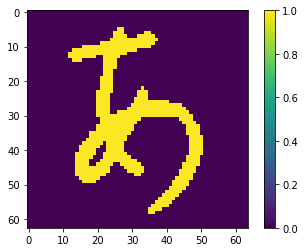

In [6]:
record = file_stream.readlist('int:16,uint:16,uint:32,bytes:504,pad:512')
record_dict = {
    'sheet_number': record[0], # type: int - Serial Sheet Number
    'JIS_KANJI_CODE': record[1], # type: binary - JIS Kanji Code (JIS X 0208)
    'JIS_READING': record[2], # type: ASCII - JIS Typical Reading (e.g. 'AI.M')
    'image_data': record[3], # type: bytes
}

width = 64
height = 63

np_img = np.array(Image.frombytes('1', (width, height), record_dict['image_data'], 'raw')).astype(int)
plt.imshow(np_img)
plt.colorbar()

In [7]:
hex(record_dict['JIS_KANJI_CODE'])

'0x2422'

In [8]:
total_samples = 0
record_count = {}

for filename in file_list:

    file_stream = bitstring.ConstBitStream(filename=filename)
    # skip the first record in each file
    file_stream.readlist('bytes:576')

    while True:
        try:
            record = file_stream.readlist('int:16,int:16,uint:32,bytes:504,pad:512')
        except:
            break
        
        total_samples += 1
        record_dict = {
            'sheet_number': record[0], # type: int - Serial Sheet Number
            'JIS_KANJI_CODE': record[1], # type: binary - JIS Kanji Code (JIS X 0208)
            'JIS_READING': record[2], # type: ASCII - JIS Typical Reading (e.g. 'AI.M')
            'image_data': record[3], # type: bytes
        }
        
        name = hex(record_dict['JIS_KANJI_CODE'])
        if name in record_count.keys():
            record_count[name] += 1
        else:
            record_count[name] = 1

In [9]:
total_samples

610236

In [10]:
len(record_count.keys())

3036

In [11]:
record_count

{'0x2422': 201,
 '0x2424': 201,
 '0x2426': 201,
 '0x2428': 201,
 '0x242a': 201,
 '0x242b': 201,
 '0x242c': 201,
 '0x242d': 201,
 '0x242e': 201,
 '0x242f': 201,
 '0x2430': 201,
 '0x2431': 201,
 '0x2432': 201,
 '0x2433': 201,
 '0x2434': 201,
 '0x2435': 201,
 '0x2436': 201,
 '0x2437': 201,
 '0x2438': 201,
 '0x2439': 201,
 '0x243a': 201,
 '0x243b': 201,
 '0x243c': 201,
 '0x243d': 201,
 '0x243e': 201,
 '0x243f': 201,
 '0x2440': 201,
 '0x2441': 201,
 '0x2442': 201,
 '0x2444': 201,
 '0x2445': 201,
 '0x2446': 201,
 '0x2447': 201,
 '0x2448': 201,
 '0x2449': 201,
 '0x244a': 201,
 '0x244b': 201,
 '0x244c': 201,
 '0x244d': 201,
 '0x244e': 201,
 '0x244f': 201,
 '0x2450': 201,
 '0x2451': 201,
 '0x2452': 201,
 '0x2453': 201,
 '0x2454': 201,
 '0x2455': 201,
 '0x2456': 201,
 '0x2457': 201,
 '0x2458': 201,
 '0x2459': 201,
 '0x245a': 201,
 '0x245b': 201,
 '0x245c': 201,
 '0x245d': 201,
 '0x245e': 201,
 '0x245f': 201,
 '0x2460': 201,
 '0x2461': 201,
 '0x2462': 201,
 '0x2464': 201,
 '0x2466': 201,
 '0x2468